## Quadratic Regression and multicollinearity

This Jupyter notebook is about two topics in multiple regression.  The first is quadratic regresion and the second is a concept called multicollinearity and results when the features/predictors are correlated.  


### Quadratic Regression

When we have a non-linear relationship among our data, then using a quadratic model for prediction can be useful.  

The model for a quadratic regression is:

$$Y= \beta_0 + \beta_1 X_1 + \beta_2 X_1^2 + \epsilon.$$



In [1]:
# reading in the libraries and functions that we will need as we do this work.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
 
import scipy.stats as st
import statsmodels.api as sm 
import pylab as py 

# here are some of the tools we will use for our analyses
from sklearn.linear_model import LinearRegression
from sklearn.metrics import PredictionErrorDisplay
from sklearn.metrics import root_mean_squared_error
from sklearn.metrics import r2_score

from statsmodels.stats.outliers_influence import variance_inflation_factor



We are going to start with the penguins data and a relationship that we looked at previously, the relationship between flipper length (*flipper_length_mm*) and body mass (*body_mass_g*).  

In [2]:
penguins = pd.read_csv("https://webpages.charlotte.edu/mschuck1/classes/DTSC2301/Data/penguins.csv", na_values=['NA'])
# remove rows with missing data
penguins.dropna(inplace=True)
penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,male,2007


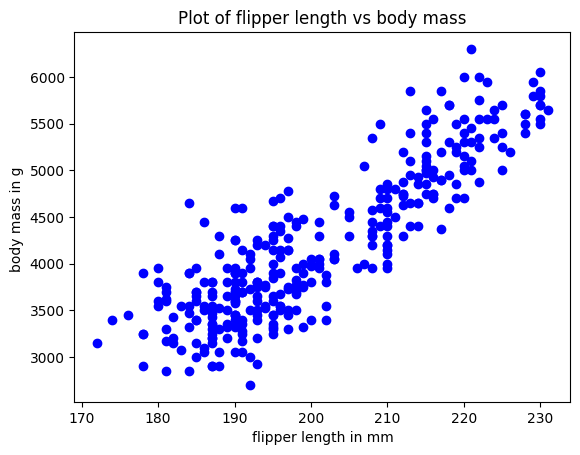

In [3]:
plt.scatter( penguins['flipper_length_mm'],penguins['body_mass_g'], color="blue")

# Add labels and title
plt.xlabel('flipper length in mm')
plt.ylabel('body mass in g ')
plt.title('Plot of flipper length vs body mass')

# Show the plot
plt.show()

When we looked at this plot before, we decided it was roughly linear, positive and moderate to strong.  
Let's fit a linear model to these data and look at the residual plot.

In [4]:
X = penguins[['flipper_length_mm']]  
y = penguins['body_mass_g']  


# Create a linear regression model
p_model = LinearRegression()

# Fit the model on the  data
p_model.fit(X, y)

# Make predictions on the  data
y_hat = p_model.predict(X)

# Evaluate the model performance
rmse = root_mean_squared_error(y, y_hat)
print('Root Mean Squared Error:', rmse)

# Get the coefficients and intercept
print('Coefficients:', p_model.coef_)
print('Intercept:', p_model.intercept_)

Root Mean Squared Error: 392.1602706380618
Coefficients: [50.15326594]
Intercept: -5872.092682842825


In [5]:
x2 = sm.add_constant(X)

#fit linear regression model
model2 = sm.OLS(y, x2).fit()

#view model summary
print(model2.summary())

                            OLS Regression Results                            
Dep. Variable:            body_mass_g   R-squared:                       0.762
Model:                            OLS   Adj. R-squared:                  0.761
Method:                 Least Squares   F-statistic:                     1060.
Date:                Mon, 03 Feb 2025   Prob (F-statistic):          3.13e-105
Time:                        09:33:24   Log-Likelihood:                -2461.1
No. Observations:                 333   AIC:                             4926.
Df Residuals:                     331   BIC:                             4934.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const             -5872.0927    310.28

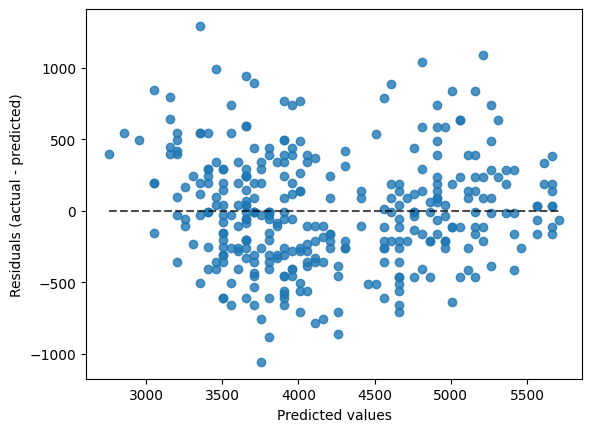

In [6]:

# below makes a residual vs predicted values plot
display = PredictionErrorDisplay(y_true=y, y_pred=y_hat)
display.plot()
plt.show()

Looking at this plot, there is some slight indications that we have a bit of pattern to these data.  
What I see if I look carefully is a slight downward pattern then an upward pattern.  It makes me 
want to consider adding a quadratic term to this model.

In [7]:
penguins['flipper_length_sq']= penguins['flipper_length_mm']*penguins['flipper_length_mm']
X = penguins[['flipper_length_mm', 'flipper_length_sq']]  
y = penguins['body_mass_g']  


# Create a linear regression model
p_model = LinearRegression()

# Fit the model on the  data
p_model.fit(X, y)

# Make predictions on the  data
y_hat = p_model.predict(X)

# Evaluate the model performance
rmse = root_mean_squared_error(y, y_hat)
print('Root Mean Squared Error:', rmse)

# Get the coefficients and intercept
print('Coefficients:', p_model.coef_)
print('Intercept:', p_model.intercept_)

Root Mean Squared Error: 378.76405250501085
Coefficients: [-171.61397648    0.54494778]
Intercept: 16579.86921475359


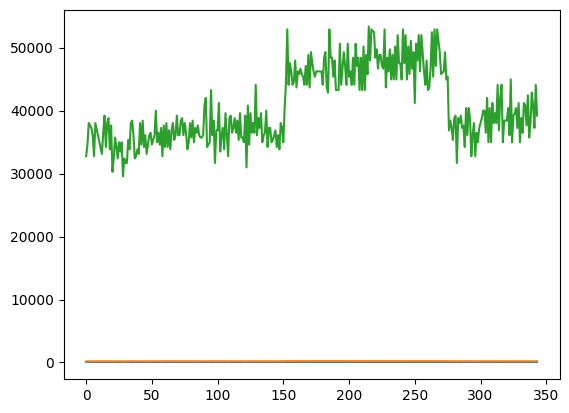

                            OLS Regression Results                            
Dep. Variable:            body_mass_g   R-squared:                       0.778
Model:                            OLS   Adj. R-squared:                  0.777
Method:                 Least Squares   F-statistic:                     578.5
Date:                Mon, 03 Feb 2025   Prob (F-statistic):          1.34e-108
Time:                        09:38:44   Log-Likelihood:                -2449.5
No. Observations:                 333   AIC:                             4905.
Df Residuals:                     330   BIC:                             4916.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const              1.658e+04   4616.24

In [11]:
x2 = sm.add_constant(X)
plt.plot(x2)
plt.show()

#fit linear regression model
model2 = sm.OLS(y, x2).fit()

#view model summary
print(model2.summary())

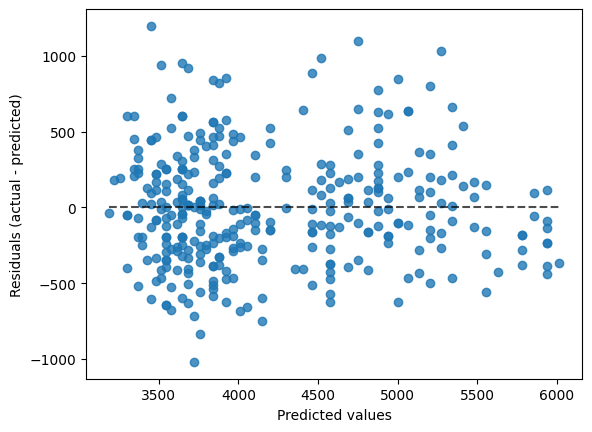

In [12]:
# below makes a residual vs predicted values plot
display = PredictionErrorDisplay(y_true=y, y_pred=y_hat)
display.plot()
plt.show()

So that is a better residual plot.  The RMSE has dropped slightly and the $r^2$ is just slightly higher.
Further looking at the model output we see that the quadratic term is discernibly different from zero.
This suggests that the quadratic model is better.  

To summarize, using a quadratic model is useful 1) when there is a clear quadratic pattern to the relationship
between the target/response and the feature/predictor or 2) when there is 
a quadratic pattern in the residuals vs fitted plot after fitting a linear model.



For fun, let's look at a plot of the predicted values for the quadratic and the linear models.

[100.       100.040008 100.080016 ... 299.919984 299.959992 300.      ]


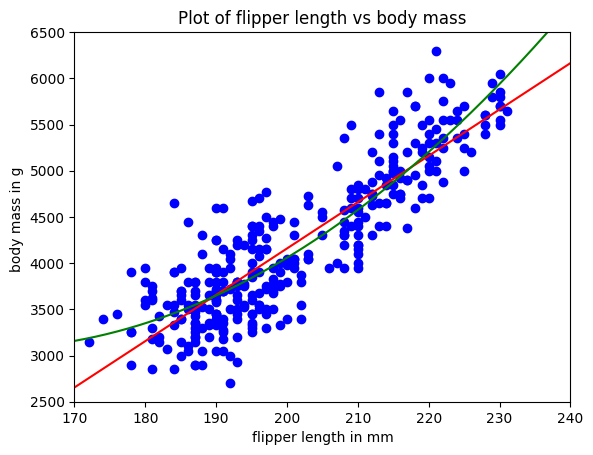

In [ ]:
# create a plot with the quadratic and the linear models
plt.scatter( penguins['flipper_length_mm'],penguins['body_mass_g'], color="blue")

# Add labels and title
plt.xlabel('flipper length in mm')
plt.ylabel('body mass in g ')
plt.title('Plot of flipper length vs body mass')
#create an array of value from 100 to 300
xseq = np.linspace(100, 300, num=5000)
print(xseq)

# Add regression line to plot
plt.plot(xseq, -5872.0927 + 50.1533*xseq , color='red')
plt.plot(xseq, 16585-171.6140*xseq + 0.5449*xseq*xseq,color="green")
#print(-5872.0927 + 50.1533*xseq)

# Set the x-axis and the y-axis limits
plt.xlim(170, 240)
plt.ylim(2500,6500)
# Show plot
plt.show()


The quadratic line (green) seems reasonable.  Human eyes are not so great a judging slight deviations from linearity. 

### Multicollinearity

Multicollinearity is something that happens when there is substantial correlation between two or more of the predictors/features.

To investigate this, we will use some old cigareete data. 

[<http://jse.amstat.org/v2n1/datasets.mcintyre.html>]

In [ ]:
cigs = pd.read_csv("https://webpages.charlotte.edu/mschuck1/classes/DTSC2301/Data/cigarettes.csv", na_values=['NA'])
cigs.head()

,Brand,Tar,Nicotine,Weight,CO
0,Alpine,14.1,0.86,0.9853,13.6
1,Benson&Hedges,16.0,1.06,1.0938,16.6
2,BullDurham,29.8,2.03,1.1650,23.5
3,CamelLights,8.0,0.67,0.9280,10.2
4,Carlton,4.1,0.40,0.9462,5.4


Our goal in this analysis is to predict carbon monoxide from the other predictors.  
We will start by building three
separate linear regressions with 
Tar, Nicotine and Weight as the predictors in each.  

In [ ]:
X=cigs[['Tar']]
y=cigs['CO']
x2 = sm.add_constant(X)

#fit linear regression model
model2 = sm.OLS(y, x2).fit()

#view model summary
print(model2.summary())

                            OLS Regression Results                            
Dep. Variable:                     CO   R-squared:                       0.917
Model:                            OLS   Adj. R-squared:                  0.913
Method:                 Least Squares   F-statistic:                     253.4
Date:                Mon, 03 Feb 2025   Prob (F-statistic):           6.55e-14
Time:                        09:46:52   Log-Likelihood:                -42.784
No. Observations:                  25   AIC:                             89.57
Df Residuals:                      23   BIC:                             92.01
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.7433      0.675      4.063      0.0

In [ ]:
X=cigs[['Nicotine']]
y=cigs['CO']
x2 = sm.add_constant(X)

#fit linear regression model
model2 = sm.OLS(y, x2).fit()

#view model summary
print(model2.summary())

                            OLS Regression Results                            
Dep. Variable:                     CO   R-squared:                       0.857
Model:                            OLS   Adj. R-squared:                  0.851
Method:                 Least Squares   F-statistic:                     138.3
Date:                Mon, 03 Feb 2025   Prob (F-statistic):           3.31e-11
Time:                        09:47:30   Log-Likelihood:                -49.518
No. Observations:                  25   AIC:                             103.0
Df Residuals:                      23   BIC:                             105.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.6647      0.994      1.675      0.1

In [19]:
X=cigs[['Weight']]
y=cigs['CO']
x2 = sm.add_constant(X)

#fit linear regression model
model2 = sm.OLS(y, x2).fit()

#view model summary
print(model2.summary())

                            OLS Regression Results                            
Dep. Variable:                     CO   R-squared:                       0.215
Model:                            OLS   Adj. R-squared:                  0.181
Method:                 Least Squares   F-statistic:                     6.309
Date:                Mon, 03 Feb 2025   Prob (F-statistic):             0.0195
Time:                        09:50:24   Log-Likelihood:                -70.832
No. Observations:                  25   AIC:                             145.7
Df Residuals:                      23   BIC:                             148.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -11.7953      9.722     -1.213      0.2

So all of the predictors are significant on their own.  Tar and Nicotine are particularly strong predictors of CO.

Next we will put them all into a model and look at the result.

In [22]:
X=cigs[['Tar', 'Nicotine','Weight']]
y=cigs['CO']
x2 = sm.add_constant(X)

#fit linear regression model
model2 = sm.OLS(y, x2).fit()

#view model summary
print(model2.summary())

                            OLS Regression Results                            
Dep. Variable:                     CO   R-squared:                       0.919
Model:                            OLS   Adj. R-squared:                  0.907
Method:                 Least Squares   F-statistic:                     78.98
Date:                Mon, 03 Feb 2025   Prob (F-statistic):           1.33e-11
Time:                        09:52:36   Log-Likelihood:                -42.509
No. Observations:                  25   AIC:                             93.02
Df Residuals:                      21   BIC:                             97.89
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.2022      3.462      0.925      0.3

A couple things to note here:
1.  r^2 is not higher appreciably higher than it was for the model with Tar alone.
2.  In each of the individual models, all of the predictors were significant.
3.  For the full model, only Tar is significant.  

Below is the code to tell about all the correlations among our predictors

In [23]:
# make a correlation matrix with predictors for 
r = X.corr()
print (r)

               Tar  Nicotine    Weight
Tar       1.000000  0.976608  0.490765
Nicotine  0.976608  1.000000  0.500183
Weight    0.490765  0.500183  1.000000


The next set of code is for calculating VIF, variance inflation factor.  VIF is a way of detecting if multicollinearity is a problem. 

In [24]:


# VIF dataframe
vif_data = pd.DataFrame()
vif_data["feature"] = x2.columns

# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(x2.values, i)
                          for i in range(len(x2.columns))]

print(vif_data[1:len(x2.columns)])

    feature        VIF
1       Tar  21.630706
2  Nicotine  21.899917
3    Weight   1.333859


The output above suggests that there is significant multicollinearity and we should be worried about Tar and Nicotine since their VIF values are $\gt$ 10.

### Tasks

1. Repeat the above analysis for multicollinearity with Fit a multiple regression model for predicting penguin body mass using flipper length, bill length and bill depth.  Determine if multicollinearity is a problem with this model.  (For now ignore the quadratic term for flipper length).

In [28]:
penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year,flipper_length_sq
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007,32761.0
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007,34596.0
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007,38025.0
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007,37249.0
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,male,2007,36100.0


In [42]:

###X=penguins[['flipper_length_mm', 'bill_length_mm','bill_depth_mm']]
#y=penguins['body_mass_g']
#x2 = sm.add_constant(X)

#fit linear regression model
#model2 = sm.OLS(y, x2).fit()

#view model summary
#print(model2.summary())###


#penguins['flipper_length_sq']= penguins['flipper_length_mm']*penguins['flipper_length_mm']
X4=penguins[['flipper_length_mm', 'bill_length_mm','bill_depth_mm']]
y4 = penguins['body_mass_g']  


# Create a linear regression model
p_model = LinearRegression()

# Fit the model on the  data
p_model.fit(X4, y4)

# Make predictions on the  data
y_hat4 = p_model.predict(X4)

# Evaluate the model performance
rmse = root_mean_squared_error(y4, y_hat4)
print('Root Mean Squared Error:', rmse)

# Get the coefficients and intercept
print('Coefficients:', p_model.coef_)
print('Intercept:', p_model.intercept_)

Root Mean Squared Error: 390.637085724585
Coefficients: [50.76213167  3.29286254 17.83639105]
Intercept: -6445.476043030193


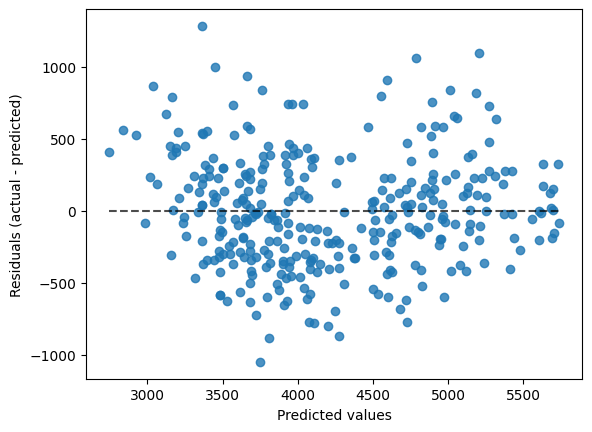

: 

In [ ]:
display = PredictionErrorDisplay(y_true=y4, y_pred=y_hat4)
display.plot()
plt.show()

In [36]:


# VIF dataframe
vif_data = pd.DataFrame()
vif_data["feature"] = x2.columns

# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(x2.values, i)
                          for i in range(len(x2.columns))]

print(vif_data[1:len(x2.columns)])

             feature       VIF
1  flipper_length_mm  2.633327
2     bill_length_mm  1.850958
3      bill_depth_mm  1.593411
